# Plot Growth Curve - single measure, without using biological replicates 

In [14]:
# Load packages
library(dplyr)
library(ggplot2)
library(patchwork)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [10]:
## Import OD tables (one tsv table per isolate)
df_test_replicates <- read.delim("/home/joao/Documents/Research/Mestrado/github/data/df_test_replicates.tsv") 
head(df_test_replicates)

,Time,Condition,OD
,<int>,<chr>,<dbl>
1,0,Glu,0.020
2,1,Glu,0.060
3,2,Glu,0.210
4,3,Glu,0.560
5,4,Glu,0.965
6,5,Glu,1.160


In [12]:
# Calculate the mean and standard deviation for each Time
df_summary <- df_test_replicates %>%
  group_by(Time, Condition) %>% # Group by Time and Condition
  summarize(
    OD_mean = mean(OD, na.rm = TRUE),  # Calculate mean OD across replicates
    OD_SD = sd(OD, na.rm = TRUE)      # Calculate standard deviation of OD across replicates
  ) %>%
  ungroup() # Remove grouping for downstream operations

head(df_summary) # visualize it 

`summarise()` has grouped output by 'Time'. You can override using the
`.groups` argument.


Time,Condition,OD_mean,OD_SD
<int>,<chr>,<dbl>,<dbl>
0,Glu,0.02300000,0.003605551
0,NC,0.01500000,0.005000000
0,Sia,0.01166667,0.002886751
1,Glu,0.06000000,0.000000000
1,NC,0.15233333,0.030270998
1,Sia,0.08166667,0.002886751


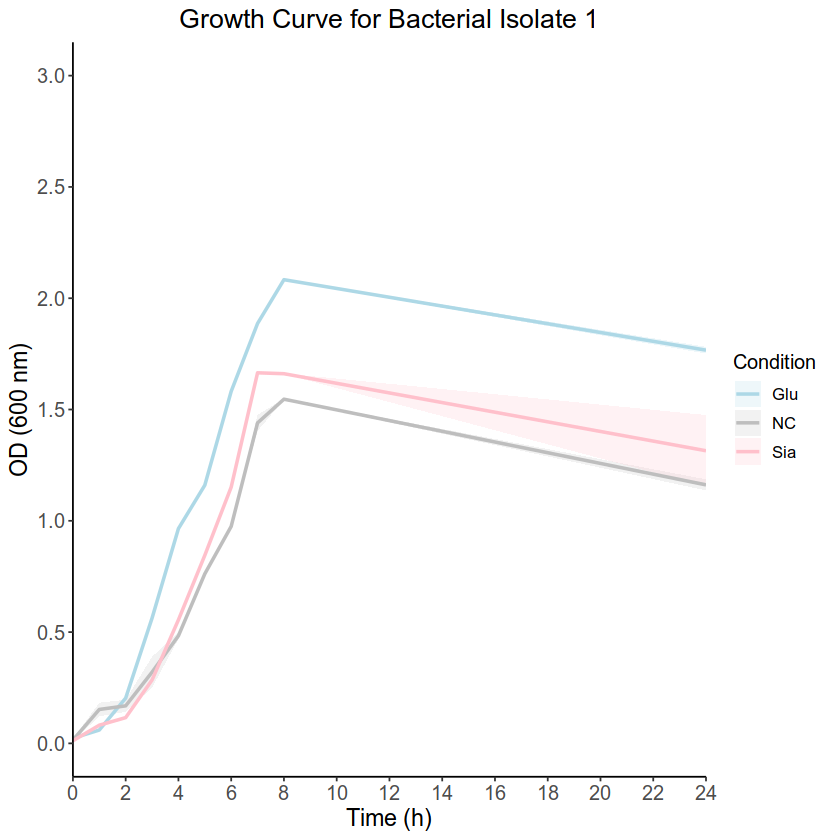

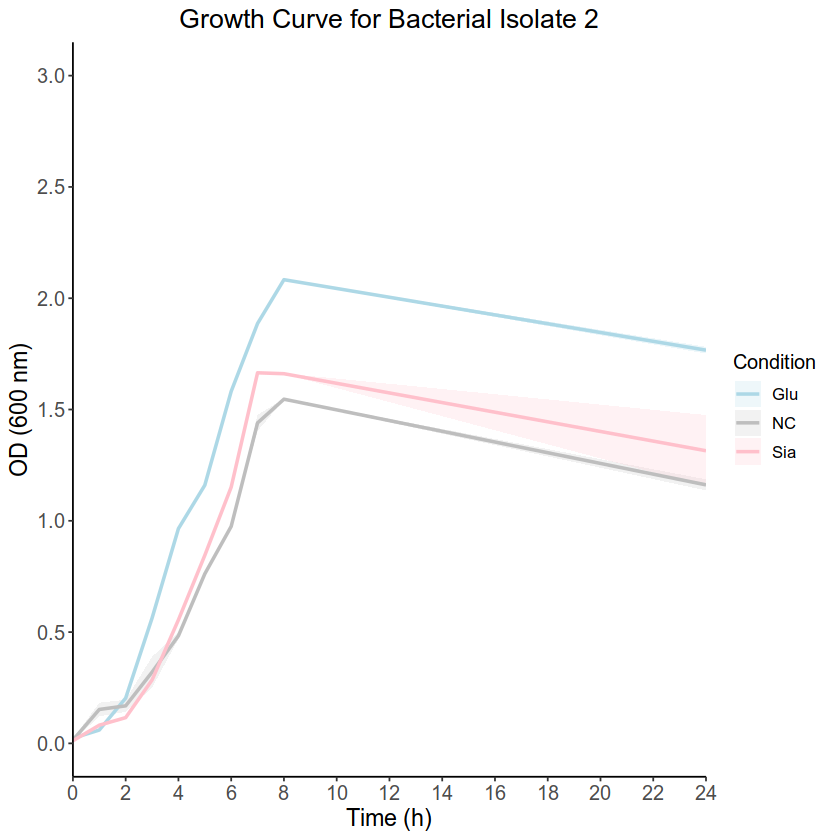

In [20]:
## Plot growth curves

### Isolate 1
plot1 <- ggplot(df_summary, aes(x = Time, y = OD_mean, color = Condition, fill = Condition)) + 
  geom_ribbon(aes(ymin = OD_mean - OD_SD, ymax = OD_mean + OD_SD), alpha = 0.2, color = NA) + # Add shaded confidence intervals
  geom_line(size = 1) + # Add lines for mean OD
  ylab("OD (600 nm)") + 
  xlab("Time (h)") + 
  ggtitle("Growth Curve for Bacterial Isolate 1") + 
  scale_color_manual(values = c("Glu" = "lightblue", "Sia" = "pink", "NC" = "gray")) + # Set specific colors for conditions
  scale_fill_manual(values = c("Glu" = "lightblue", "Sia" = "pink", "NC" = "gray")) + # Ensure fill matches line color
  theme_classic() +
  theme(
    plot.title = element_text(size = 16, hjust = 0.5),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  ) +
  scale_y_continuous(limits = c(0, 3), breaks = seq(0, 3, by = 0.5)) + # Set y-axis range (i.e. OD min and max) and breaks 
  scale_x_continuous(expand = c(0, 0), breaks = seq(0, 24, by = 2)) # Adjust time scale (0 to 24 hours)

plot1

### Isolate 2
plot2 <- ggplot(df_summary, aes(x = Time, y = OD_mean, color = Condition, fill = Condition)) + 
  geom_ribbon(aes(ymin = OD_mean - OD_SD, ymax = OD_mean + OD_SD), alpha = 0.2, color = NA) + # Add shaded confidence intervals
  geom_line(size = 1) + # Add lines for mean OD
  ylab("OD (600 nm)") + 
  xlab("Time (h)") + 
  ggtitle("Growth Curve for Bacterial Isolate 2") + 
  scale_color_manual(values = c("Glu" = "lightblue", "Sia" = "pink", "NC" = "gray")) + # Set specific colors for conditions
  scale_fill_manual(values = c("Glu" = "lightblue", "Sia" = "pink", "NC" = "gray")) + # Ensure fill matches line color
  theme_classic() +
  theme(
    plot.title = element_text(size = 16, hjust = 0.5),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  ) +
  scale_y_continuous(limits = c(0, 3), breaks = seq(0, 3, by = 0.5)) + # Set y-axis range (i.e. OD min and max) and breaks 
  scale_x_continuous(expand = c(0, 0), breaks = seq(0, 24, by = 2)) # Adjust time scale (0 to 24 hours)

plot2

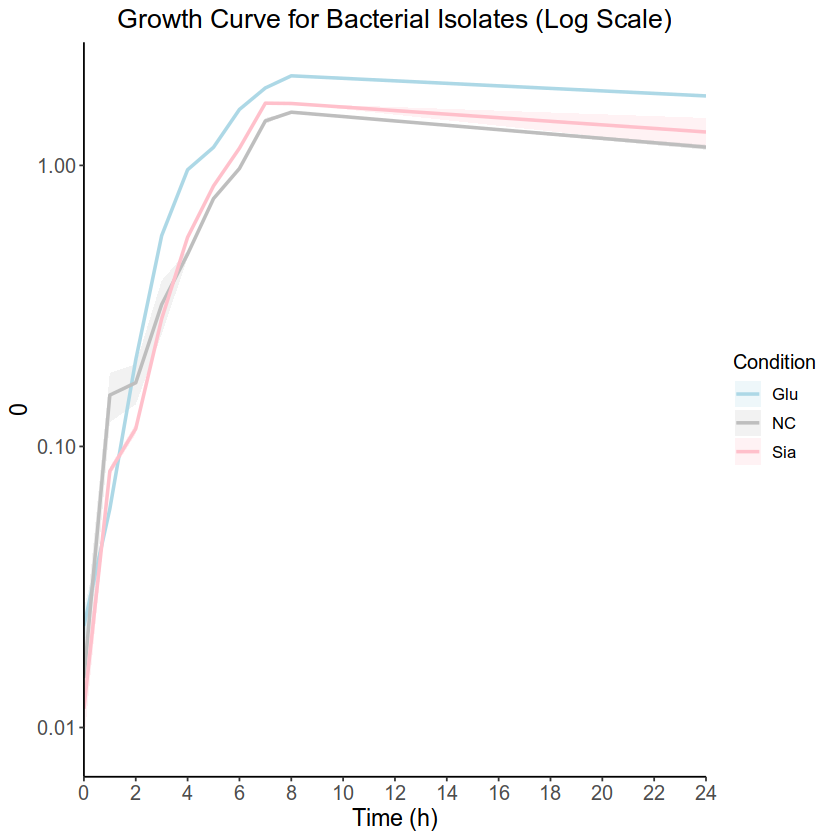

In [30]:
## ALT: Plot growth curves with OD values in log10
plot1_alt <- ggplot(df_summary, aes(x = Time, y = OD_mean, color = Condition, fill = Condition)) + 
  geom_ribbon(aes(ymin = OD_mean - OD_SD, ymax = OD_mean + OD_SD), alpha = 0.2, color = NA) + # Add shaded confidence intervals
  geom_line(size = 1) + # Add lines for mean OD
  ylab("OD (600 nm") + 
  xlab("Time (h)") + 
  ggtitle("Growth Curve for Bacterial Isolates (Log Scale)") + 
  scale_color_manual(values = c("Glu" = "lightblue", "Sia" = "pink", "NC" = "gray")) + # Set specific colors for conditions
  scale_fill_manual(values = c("Glu" = "lightblue", "Sia" = "pink", "NC" = "gray")) + # Ensure fill matches line color
  theme_classic() +
  theme(
    plot.title = element_text(size = 16, hjust = 0.5),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  ) +
  scale_y_continuous(trans = "log10", seq(0, 2, by = 0.5)) + # Log scale for y-axis; change depending on OD
  scale_x_continuous(expand = c(0, 0), breaks = seq(0, 24, by = 2)) # Adjust time scale (0 to 24 hours)

plot1_alt

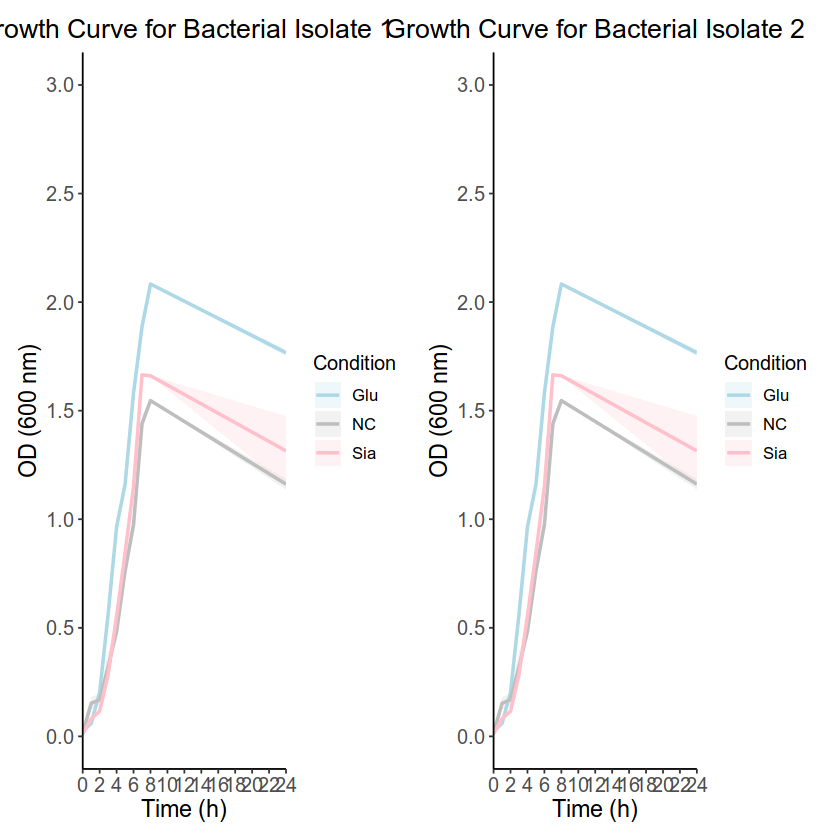

In [21]:
## Combine all plots in a single panel
combined_plot <- plot1 + plot2 + plot_layout(ncol = 2, nrow = 1) # specify number of rows and columns  as needed

combined_plot # Visualize it